# Problem Statement:-


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# there are total 614 rows and 13 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# There are null values present in the dataset.

<AxesSubplot:>

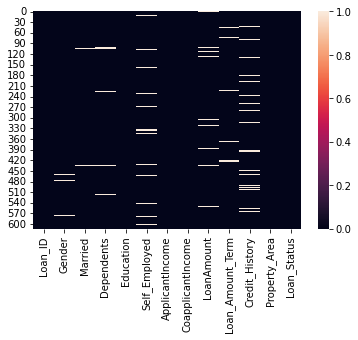

In [9]:
sns.heatmap(df.isnull())

In [10]:
        df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
# let's deal wwith the null values first.

In [12]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
# There are no null values present now.

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [18]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
# the column 'Loan_ID' refer to the unique identifier of the applicant's affirmed purchases, it will not contribute in building  the model, so we will remove it.

In [21]:
df=df.drop(columns=['Loan_ID'])

In [22]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
# Columns 'Loan_Status' is our target variable.

# Data Visualisation.

Male      502
Female    112
Name: Gender, dtype: int64


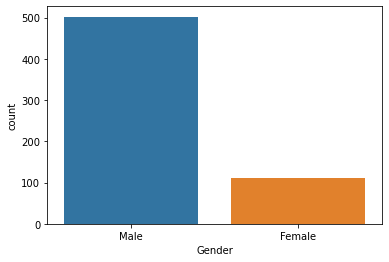

In [24]:
s=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

In [25]:
# The no. of male in the dataset are higher as compared to that of female

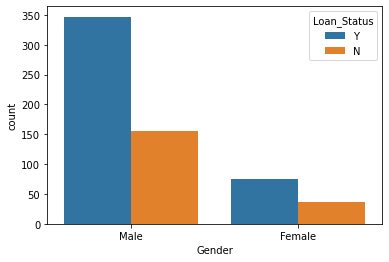

In [26]:
 chart = sns.countplot(x='Gender',data=df,hue='Loan_Status')

Yes    401
No     213
Name: Married, dtype: int64


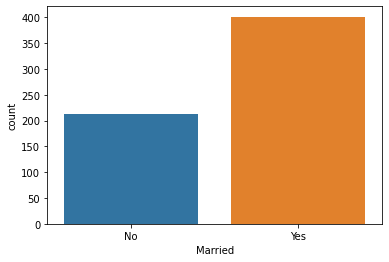

In [27]:
s=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())


In [28]:
# the no. of married people are more.

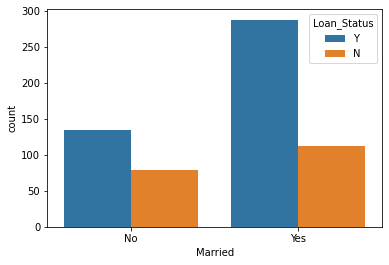

In [29]:
 chart = sns.countplot(x='Married',data=df,hue='Loan_Status')

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


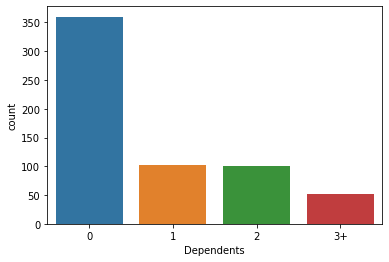

In [30]:
s=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())


In [31]:
# people with '0' dependents are very high.

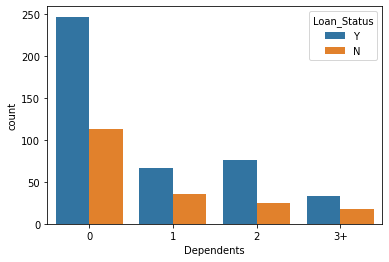

In [32]:
 chart = sns.countplot(x='Dependents',data=df,hue='Loan_Status')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


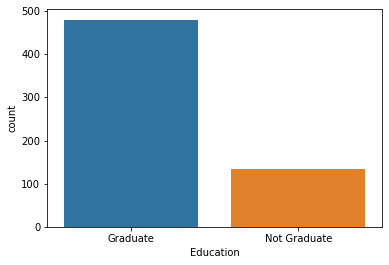

In [33]:
s=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())


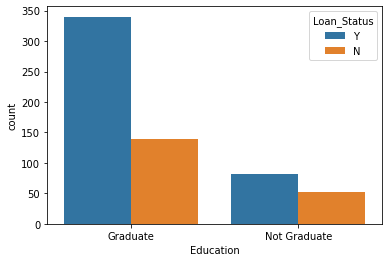

In [34]:
 chart = sns.countplot(x='Education',data=df,hue='Loan_Status')

In [35]:
# graduated people are more likely to get loan.

No     532
Yes     82
Name: Self_Employed, dtype: int64


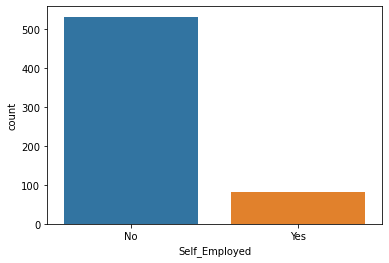

In [36]:
s=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())


In [37]:
# the total no. self employed people are very less.

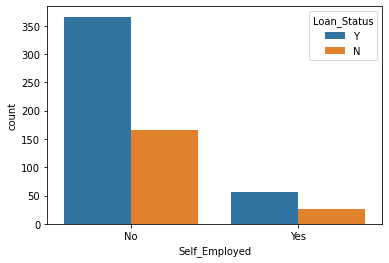

In [38]:
 chart = sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


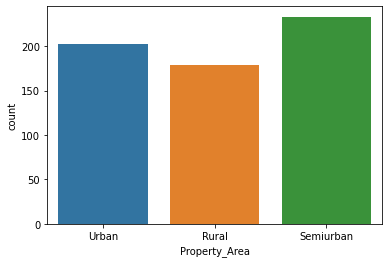

In [39]:
s=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())


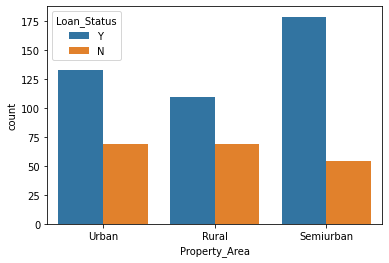

In [40]:
 chart = sns.countplot(x='Property_Area',data=df,hue='Loan_Status')

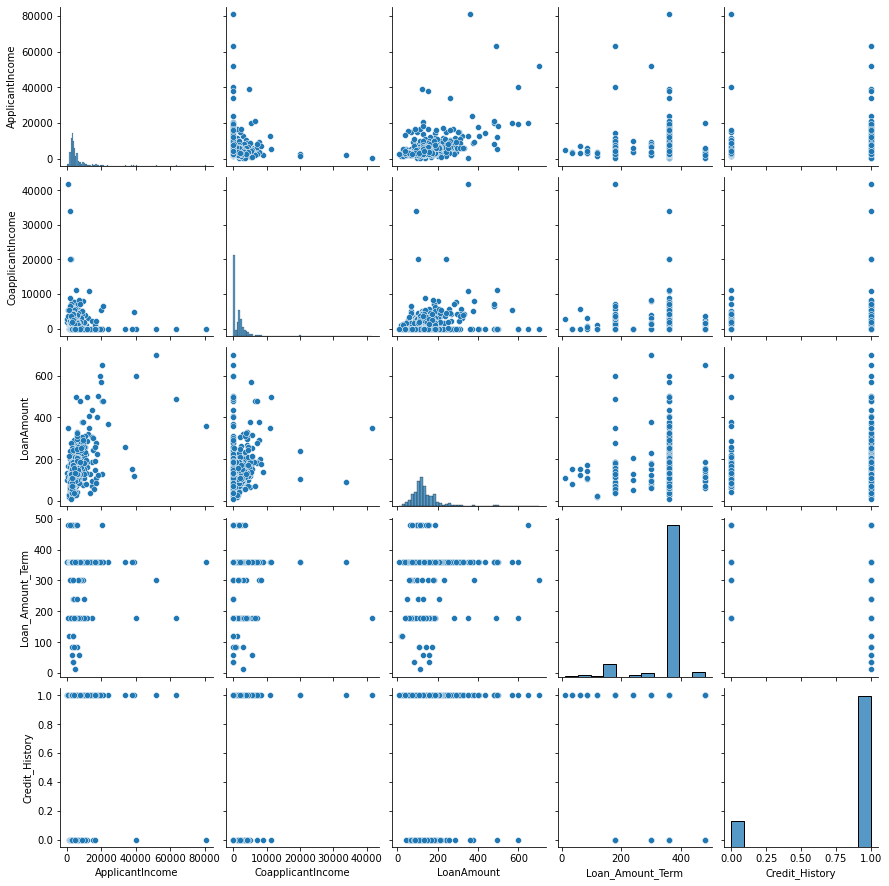

In [41]:
sns.pairplot(df)

In [42]:
# now let's encode the data.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [44]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [45]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [46]:
df['Gender'].value_counts()

0    502
1    112
Name: Gender, dtype: int64

In [47]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [48]:
df.replace({'Married':{'Yes':1,'No':0}},inplace=True)

In [49]:
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [50]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [51]:
df.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':4}},inplace=True)

In [52]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [53]:
print(df['Education'].value_counts())
print('\n==========\n')
print(df['Self_Employed'].value_counts())
print('\n==========\n')
print(df['Property_Area'].value_counts())


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [54]:
df.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [55]:
print(df['Education'].value_counts())
print('\n==========\n')
print(df['Self_Employed'].value_counts())
print('\n==========\n')
print(df['Property_Area'].value_counts())


1    480
0    134
Name: Education, dtype: int64


0    532
1     82
Name: Self_Employed, dtype: int64


1    233
2    202
0    179
Name: Property_Area, dtype: int64


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [57]:
# now we will encode our target variable. 

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loan_Status']= le.fit_transform(df['Loan_Status'])


In [59]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


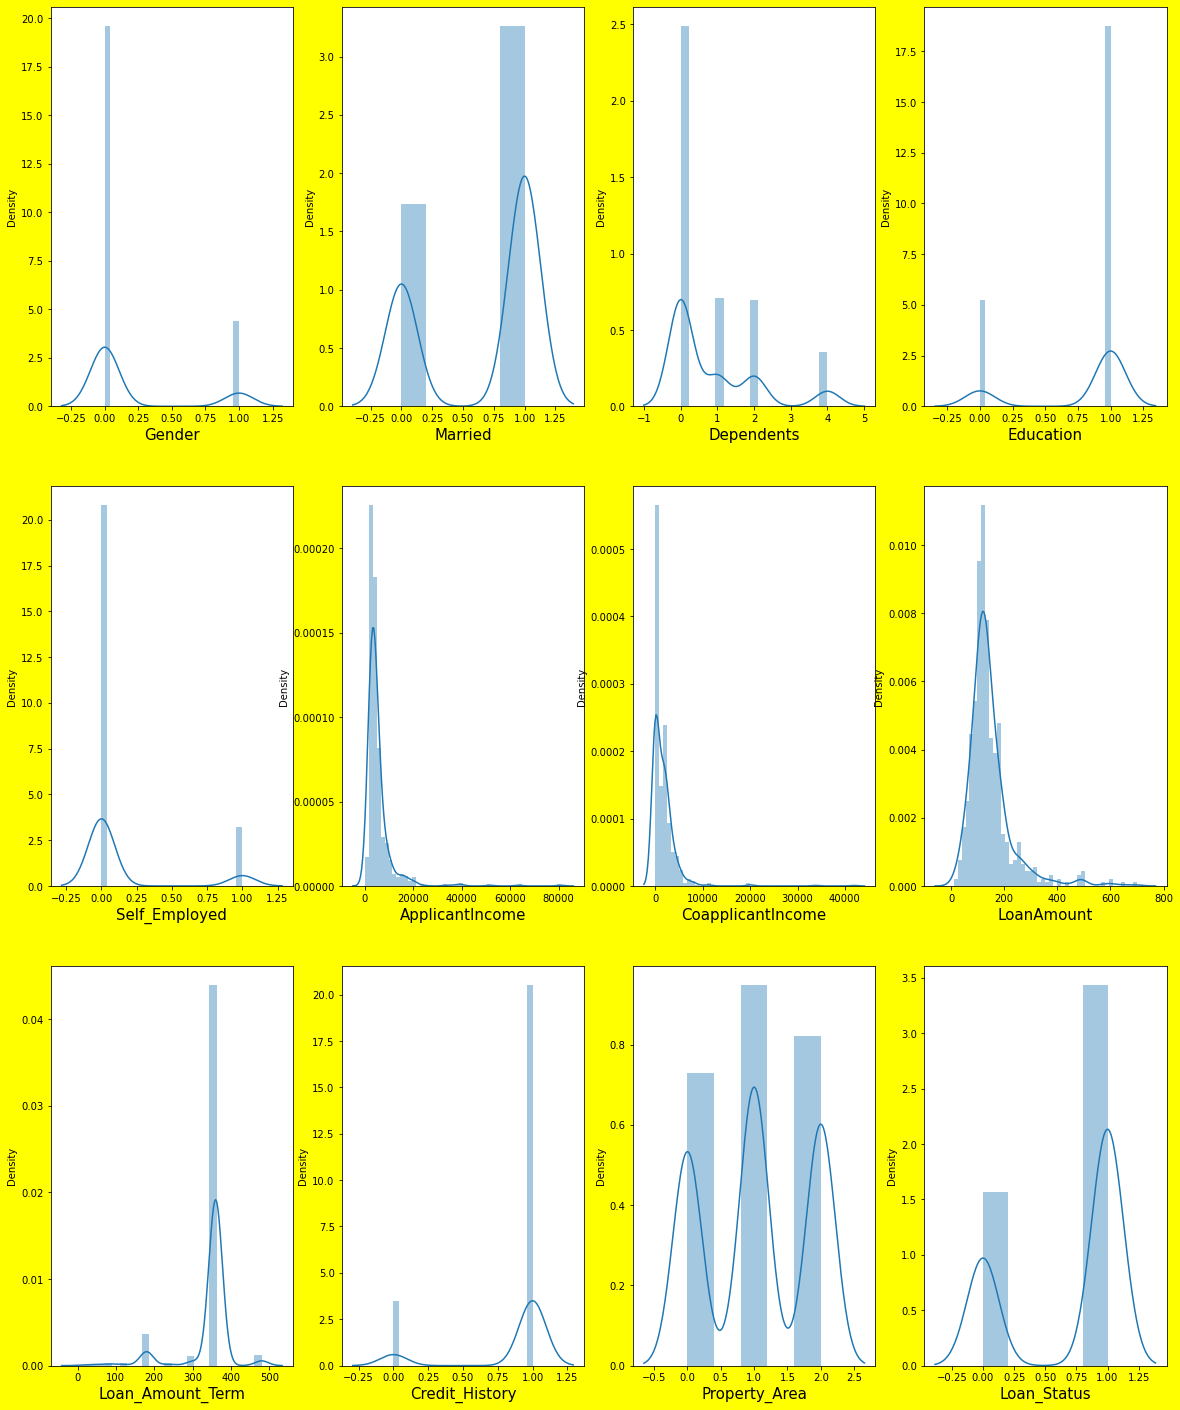

In [61]:
plt.figure(figsize=(20,25),facecolor='Yellow')
pltno=1

for c in df:
    if pltno<=12:
        ax=plt.subplot(3,4,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [62]:
df.skew()

Gender               1.648795
Married             -0.644850
Dependents           1.456965
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [63]:
# there  is definitely some skewness present.

<AxesSubplot:>

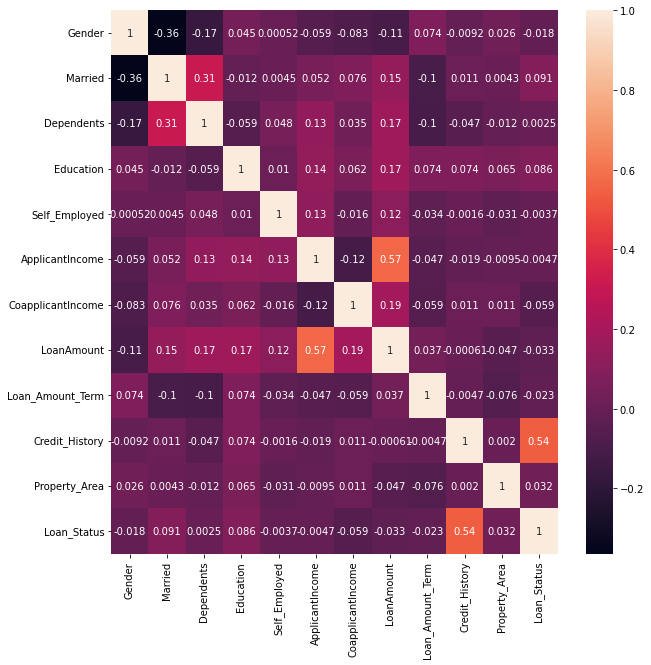

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [65]:
# Let's check for the outliers also.

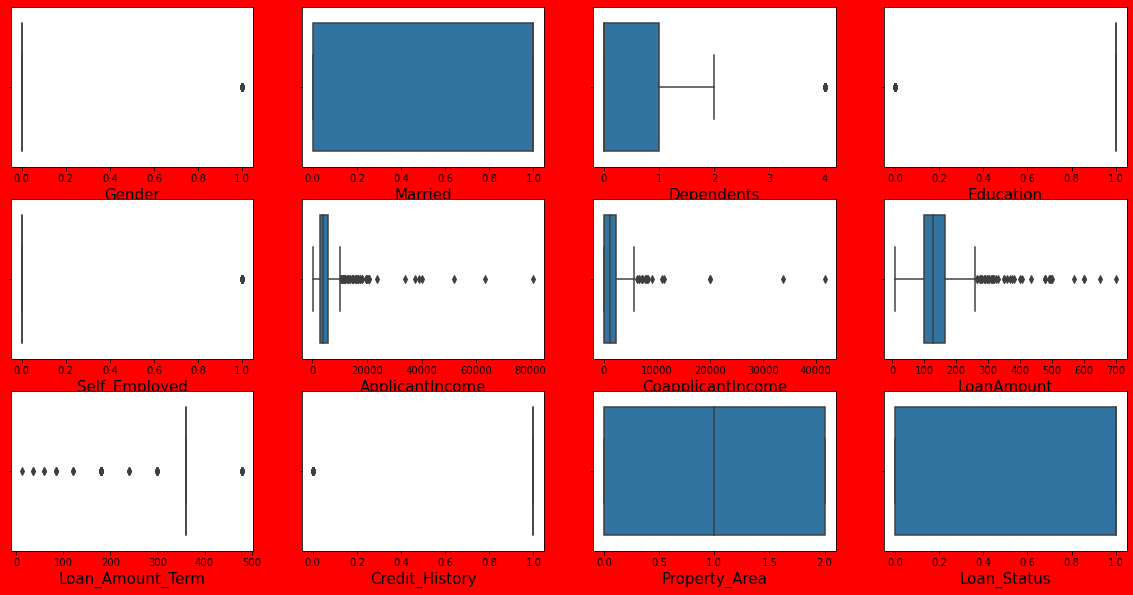

In [66]:
plt.figure(figsize=(20,10),facecolor='r')
pn=1
for c in df:
    if pn<=12:
        ax=plt.subplot(3,4,pn)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    pn+=1

In [67]:
# There are outliers present in the dataset, let's deal with them.

In [68]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(614, 12)

In [69]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [70]:
 df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [71]:
df1.shape

(577, 12)

In [72]:
df.shape

(614, 12)

In [73]:
# data loss

(614-577)/614*100

6.026058631921824

In [74]:
# 6.02% of data loss is acceptable. 

In [75]:
# now let's seperate the features and label.

In [76]:
x=df1.drop(columns=['Loan_Status'])
y=df1['Loan_Status']

In [77]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [78]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [79]:
x.skew()

Gender               1.622920
Married             -0.630211
Dependents           1.500252
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [80]:
# let's deal with the skewness

In [81]:
s=['Gender','Dependents','ApplicantIncome','LoanAmount','Loan_Amount_Term']

In [82]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')

In [83]:
x[s] = yj.fit_transform(x[s].values)

In [84]:
x.skew()

Gender               1.622920
Married             -0.630211
Dependents           0.496677
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome    1.350517
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

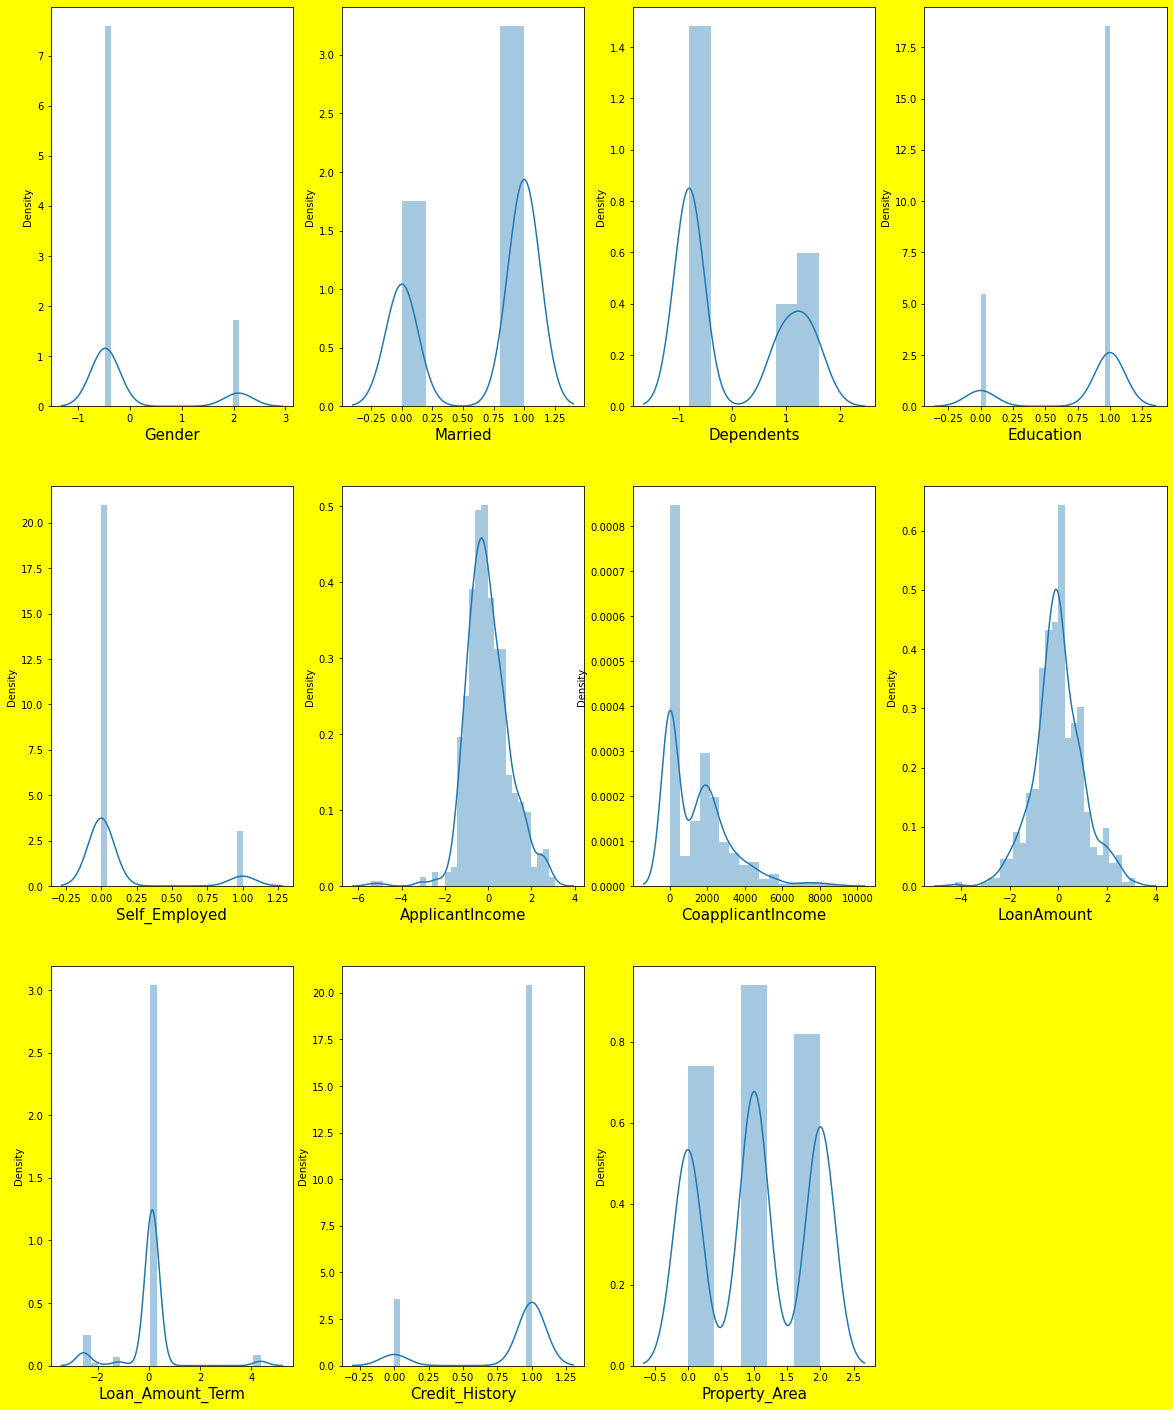

In [85]:
plt.figure(figsize=(20,25),facecolor='Yellow')
pltno=1

for c in x:
    if pltno<=12:
        ax=plt.subplot(3,4,pltno)
        sns.distplot(x[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [86]:
# The data looks better than before.

In [87]:
cor=df.corr()

In [88]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
Property_Area        0.032112
Dependents           0.002474
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Gender              -0.017987
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

In [89]:
# Now we will standardise the data.

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.47713685, -1.36251079, -0.80689739, ...,  0.13078824,
         0.41851254,  1.22747207],
       [-0.47713685,  0.73393914,  0.88093954, ...,  0.13078824,
         0.41851254, -1.30652215],
       [-0.47713685,  0.73393914, -0.80689739, ...,  0.13078824,
         0.41851254,  1.22747207],
       ...,
       [-0.47713685,  0.73393914,  0.88093954, ...,  0.13078824,
         0.41851254,  1.22747207],
       [-0.47713685,  0.73393914,  1.32110655, ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 2.09583477, -1.36251079, -0.80689739, ...,  0.13078824,
        -2.38941464, -0.03952504]])

In [91]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [92]:
xx

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.477137,-1.362511,-0.806897,0.541961,-0.380580,0.681780,-0.861036,0.000771,0.130788,0.418513,1.227472
1,-0.477137,0.733939,0.880940,0.541961,-0.380580,0.234783,0.052840,0.000771,0.130788,0.418513,-1.306522
2,-0.477137,0.733939,-0.806897,0.541961,2.627567,-0.527201,-0.861036,-1.437336,0.130788,0.418513,1.227472
3,-0.477137,0.733939,-0.806897,-1.845150,-0.380580,-0.791972,0.567956,-0.153545,0.130788,0.418513,1.227472
4,-0.477137,-1.362511,-0.806897,0.541961,-0.380580,0.728848,-0.861036,0.238260,0.130788,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,2.095835,-1.362511,-0.806897,0.541961,-0.380580,-0.587375,-0.861036,-1.293791,0.130788,0.418513,-1.306522
573,-0.477137,0.733939,1.612434,0.541961,-0.380580,0.035386,-0.861036,-2.332692,-2.562700,0.418513,-1.306522
574,-0.477137,0.733939,0.880940,0.541961,-0.380580,1.281658,-0.715592,1.845015,0.130788,0.418513,1.227472
575,-0.477137,0.733939,1.321107,0.541961,-0.380580,1.164426,-0.861036,0.976055,0.130788,0.418513,1.227472


In [93]:
# now we will check the vif values

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

In [96]:
vif

,Vif values,features
0,1.209212,Gender
1,1.370005,Married
2,1.189979,Dependents
3,1.072506,Education
4,1.055308,Self_Employed
5,1.658099,ApplicantIncome
6,1.474426,CoapplicantIncome
7,1.664141,LoanAmount
8,1.062626,Loan_Amount_Term
9,1.008470,Credit_History


In [97]:
# The VIF values of all the features are  under 10.

In [98]:
# now we will build the models.

In [99]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [100]:
#our target variable is imbalanced, so we will balance the data first.

In [101]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=44)
train_x,train_y=smt.fit_resample(xx,y)
train_y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [102]:
df_new=pd.DataFrame(data=train_x)
df_new['Loan_Status']=train_y
ndf=df_new
ndf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-0.477137,-1.362511,-0.806897,0.541961,-0.380580,0.681780,-0.861036,0.000771,0.130788,0.418513,1.227472,1
1,-0.477137,0.733939,0.880940,0.541961,-0.380580,0.234783,0.052840,0.000771,0.130788,0.418513,-1.306522,0
2,-0.477137,0.733939,-0.806897,0.541961,2.627567,-0.527201,-0.861036,-1.437336,0.130788,0.418513,1.227472,1
3,-0.477137,0.733939,-0.806897,-1.845150,-0.380580,-0.791972,0.567956,-0.153545,0.130788,0.418513,1.227472,1
4,-0.477137,-1.362511,-0.806897,0.541961,-0.380580,0.728848,-0.861036,0.238260,0.130788,0.418513,1.227472,1
...,...,...,...,...,...,...,...,...,...,...,...,...
791,0.442498,-1.362511,-0.806897,0.541961,-0.380580,-0.172087,-0.310645,-0.684426,4.360131,0.418513,0.321768,0
792,-0.477137,0.733939,-0.806897,-1.845150,-0.380580,-0.760588,0.353864,-0.215397,0.130788,-2.389415,0.057412,0
793,-0.477137,-1.362511,0.989565,0.541961,-0.380580,-0.048678,-0.861036,-0.331047,0.130788,-2.389415,-1.306522,0
794,2.095835,-1.362511,-0.806897,0.541961,0.847853,-0.492981,-0.436115,-0.165562,-0.399237,0.418513,-0.789120,0


In [103]:
# now there are 796 rows and 12 columns in the dataset.

In [104]:
x=ndf.drop(columns=['Loan_Status'])
y=ndf['Loan_Status']

In [105]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.477137,-1.362511,-0.806897,0.541961,-0.380580,0.681780,-0.861036,0.000771,0.130788,0.418513,1.227472
1,-0.477137,0.733939,0.880940,0.541961,-0.380580,0.234783,0.052840,0.000771,0.130788,0.418513,-1.306522
2,-0.477137,0.733939,-0.806897,0.541961,2.627567,-0.527201,-0.861036,-1.437336,0.130788,0.418513,1.227472
3,-0.477137,0.733939,-0.806897,-1.845150,-0.380580,-0.791972,0.567956,-0.153545,0.130788,0.418513,1.227472
4,-0.477137,-1.362511,-0.806897,0.541961,-0.380580,0.728848,-0.861036,0.238260,0.130788,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
791,0.442498,-1.362511,-0.806897,0.541961,-0.380580,-0.172087,-0.310645,-0.684426,4.360131,0.418513,0.321768
792,-0.477137,0.733939,-0.806897,-1.845150,-0.380580,-0.760588,0.353864,-0.215397,0.130788,-2.389415,0.057412
793,-0.477137,-1.362511,0.989565,0.541961,-0.380580,-0.048678,-0.861036,-0.331047,0.130788,-2.389415,-1.306522
794,2.095835,-1.362511,-0.806897,0.541961,0.847853,-0.492981,-0.436115,-0.165562,-0.399237,0.418513,-0.789120


In [106]:
y

0      1
1      0
2      1
3      1
4      1
      ..
791    0
792    0
793    0
794    0
795    0
Name: Loan_Status, Length: 796, dtype: int32

## In our target variable, 1 stands for 'Yes' and 0 stands for 'No'.

In [107]:
# Classification model will be build.

# Model Building.

In [108]:
#importing necessary libraries for model building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [110]:
maxAccu=0
maxRS=0
lg=LogisticRegression()
for i in range(20,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.25)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy score is', maxAccu , 'on random state', maxRS)

Best Accuracy score is 0.7738693467336684 on random state 38


In [112]:
# the model gives best accuracy at random state 38

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=38,test_size=.25)


# Logistic Regression.

In [114]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lpred=lr.predict(xtest)
print(accuracy_score(ytest,lpred))
print(confusion_matrix(ytest,lpred))
print(classification_report(ytest,lpred))

0.7738693467336684
[[65 36]
 [ 9 89]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       101
           1       0.71      0.91      0.80        98

    accuracy                           0.77       199
   macro avg       0.80      0.78      0.77       199
weighted avg       0.80      0.77      0.77       199



In [115]:
# 77.38% accuracy.

# RandomForest Classifier.

In [116]:
rc=RandomForestClassifier()
rc.fit(xtrain,ytrain)
cpred=rc.predict(xtest)
print(accuracy_score(ytest,cpred))
print(confusion_matrix(ytest,cpred))
print(classification_report(ytest,cpred))

0.8341708542713567
[[82 19]
 [14 84]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       101
           1       0.82      0.86      0.84        98

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.84      0.83      0.83       199



In [118]:
# 83.41% accuracy.

# SVC

In [119]:
svc=SVC()
svc.fit(xtrain,ytrain)
spred=svc.predict(xtest)
print(accuracy_score(ytest,spred))
print(confusion_matrix(ytest,spred))
print(classification_report(ytest,spred))

0.7939698492462312
[[73 28]
 [13 85]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       101
           1       0.75      0.87      0.81        98

    accuracy                           0.79       199
   macro avg       0.80      0.80      0.79       199
weighted avg       0.80      0.79      0.79       199



In [120]:
# 79.39% accuracy.

# DecisionTree Classifier

In [121]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dpred=dt.predict(xtest)
print(accuracy_score(ytest,dpred))
print(confusion_matrix(ytest,dpred))
print(classification_report(ytest,dpred))

0.7286432160804021
[[80 21]
 [33 65]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       101
           1       0.76      0.66      0.71        98

    accuracy                           0.73       199
   macro avg       0.73      0.73      0.73       199
weighted avg       0.73      0.73      0.73       199



In [122]:
# 72.86% accuracy.

# KNeighbors Classifier.

In [123]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(accuracy_score(ytest,kpred))
print(confusion_matrix(ytest,kpred))
print(classification_report(ytest,kpred))

0.7738693467336684
[[84 17]
 [28 70]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       101
           1       0.80      0.71      0.76        98

    accuracy                           0.77       199
   macro avg       0.78      0.77      0.77       199
weighted avg       0.78      0.77      0.77       199



In [124]:
# 77.38% accuracy.

# CrossValidation Score.


In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
#for logistic regression

ls=cross_val_score(lr,x,y)
print(ls)
print(ls.mean())

[0.70625    0.74213836 0.73584906 0.73584906 0.76100629]
0.7362185534591196


In [127]:
# for random forest classifier

rs=cross_val_score(rc,x,y)
print(rs)
print(rs.mean())

[0.775      0.80503145 0.87421384 0.88679245 0.9245283 ]
0.8531132075471699


In [128]:
# for svc

ss=cross_val_score(svc,x,y)
print(ss)
print(ss.mean())

[0.7125     0.74842767 0.75471698 0.74213836 0.7672956 ]
0.7450157232704402


In [129]:
# for decisiontree classifier

ds=cross_val_score(dt,x,y)
print(ds)
print(ds.mean())

[0.7125     0.72955975 0.81132075 0.79245283 0.83647799]
0.7764622641509434


In [130]:
# for kneighbors classifier

ks=cross_val_score(k,x,y)
print(ks)
print(ks.mean())


[0.70625    0.69811321 0.7672956  0.77987421 0.79874214]
0.7500550314465408


In [131]:
#  as per the observation, RandomForest Classifier is our best model so far.
# so hyperparameter tuning will be done on that model

# HyperParameter Tuning

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(rc,param,cv=5,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}

In [134]:
fmodel=RandomForestClassifier(max_features='sqrt',criterion='entropy',max_depth=15)

In [135]:
fmodel.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt')

In [136]:
pred=fmodel.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc*100)

83.41708542713567


In [137]:
#  the randomforest classifier gives the accuracy of 83.41%

In [138]:
# let's save the model

In [139]:
import joblib
joblib.dump(fmodel,'loan_application_status_prediction')

['loan_application_status_prediction']

In [140]:
#load the model

In [141]:
m = joblib.load("loan_application_status_prediction")
print(m.predict(xtest))

[1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1
 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0
 1 0 0 1 1 0 1 0 0 1 1 0 1 0]


In [142]:
d=pd.DataFrame({'predicted values':pred,'actual values':ytest})

In [143]:
d

,predicted values,actual values
3,1,1
230,1,1
273,1,1
336,1,1
45,1,1
...,...,...
134,1,1
291,1,1
769,0,0
124,1,0


# AUC-ROC curve.

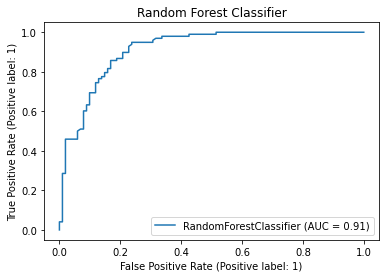

In [145]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(fmodel,xtest,ytest)
plt.title('Random Forest Classifier')
plt.show()


In [147]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(ytest, fmodel.predict(xtest))

In [148]:
auc_score

0.8348151141644776